# 数字图像处理实验七

## 任务1

- 请编写代码，通过频域滤波方法，过滤掉stripy_cameraman.png中的条状噪声

- 提示：通过在频域比较cameraman.tif的频谱图像来确定滤掉哪个部分

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(imglist:list):
    for id,img in enumerate(imglist):
        cv2.imshow(f"{id}",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def show_plt(imglist):
    for img in imglist:
        plt.imshow(img[:,:,::-1])
        plt.show()

In [3]:
stripy = cv2.imread("stripy_cameraman.png",0)
cameraman = cv2.imread("cameraman.tif",0)

In [150]:
def fouriershow(img,save=False,args=(0,0)):
    fourier = np.fft.fft2(img)  # 进行傅里叶变换
    fouriershift = np.fft.fftshift(fourier) # 将FFT输出中的直流分量移动到频谱的中央
    magnitude_spectrum  = 20 * np.log(np.abs(fourier)) # 对复数数组进行调整得到幅度谱
    log_magnitude_spectrum = 20 * np.log(np.abs(fouriershift)+1) # 幅度谱取对数
    if args[0]:
        plt.imshow(img , cmap = 'gray')
        plt.title('original')
        plt.axis('off')
        plt.show()
    if args[1]:
        plt.imshow(magnitude_spectrum , cmap = 'gray')
        plt.title('magnitude spectrum')
        plt.axis('off')
        plt.show()
    plt.imshow(log_magnitude_spectrum , cmap = 'gray')
    plt.title("log magnitude spectrum")
    plt.axis('off')
    plt.show()
    if save:
        cv2.imwrite("log_magnitude_spectrum.png",log_magnitude_spectrum)

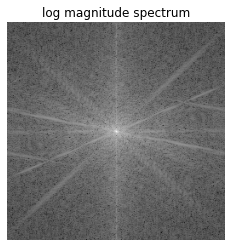

In [5]:
fouriershow(cameraman)

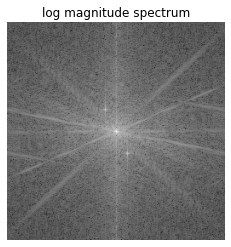

In [102]:
fouriershow(stripy,True)

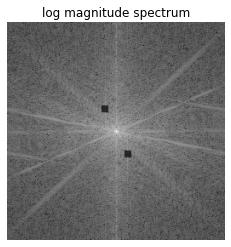

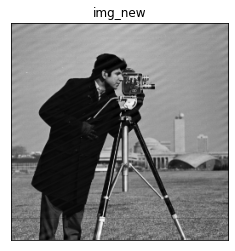

In [153]:
fourier = np.fft.fft2(stripy)
fourier_shift = np.fft.fftshift(fourier)
fourier_shift[98:98+9,111:111+9] = 0
fourier_shift[151:151+9,138:138+9] = 0
ifourier_shift = np.fft.ifftshift(fourier_shift)
stripy_ifft = np.fft.ifft2(ifourier_shift)
stripy_ifft = np.abs(stripy_ifft)
fouriershow(stripy_ifft)
plt.imshow(stripy_ifft, 'gray')
plt.title('img_new')
plt.xticks([]), plt.yticks([])
plt.show()

## 任务2

- 将彩色图像'araras.jpg的RGB 3个通道用灰度图显示出来


In [117]:
araras = cv2.imread("araras.jpg")

In [118]:
arars_bgr = [araras[:,:,0],araras[:,:,1],araras[:,:,2]]

In [119]:
show(arars_bgr)

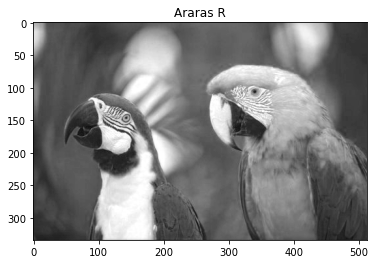

In [120]:
plt.imshow(arars_bgr[2])
plt.title("Araras R")
plt.set_cmap('gray')
plt.show()

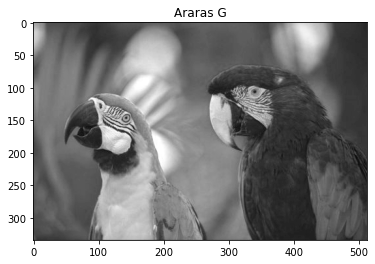

In [121]:
plt.imshow(arars_bgr[1])
plt.title("Araras G")
plt.set_cmap('gray')
plt.show()

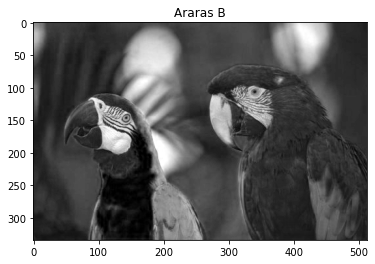

In [122]:
plt.imshow(arars_bgr[0])
plt.title("Araras B")
plt.set_cmap('gray')
plt.show()


## 任务3

- 实现彩色图像的直方图均衡化，并用stream.jpg 来验证

- 提示：转换到HSI空间，仅对亮度分量用直方图均衡化，再转换回RGB

In [123]:
stream = cv2.imread("stream.jpg")

In [124]:
stream_hsi = cv2.cvtColor(stream, cv2.COLOR_BGR2HLS)

In [125]:
stream_hsi[:,:,1]=cv2.equalizeHist(stream_hsi[:,:,1])


In [126]:
stream_hsi_equalized = cv2.cvtColor(stream_hsi, cv2.COLOR_HLS2BGR)

In [127]:
show([stream,stream_hsi_equalized])

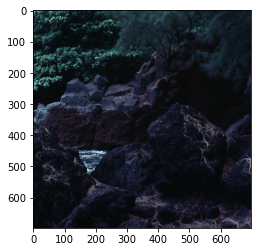

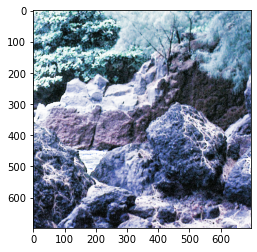

In [128]:
show_plt([stream,stream_hsi_equalized])